In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [65]:
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [66]:
file_path = '../Resources/malwares/Android_Malware.csv'
mal_df = pd.read_csv(file_path, delimiter=',')
mal_df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [67]:
mal_df = mal_df.iloc[:,1:]
mal_df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,17/06/2017 01:29:11,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,17/06/2017 01:30:33,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,17/06/2017 01:29:45,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,17/06/2017 01:29:45,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [68]:
mal_df.nunique()

Flow ID              176955
 Source IP             2536
 Source Port          51343
 Destination IP        4746
 Destination Port     19409
                      ...  
Idle Mean             39823
 Idle Std              8887
 Idle Max             39789
 Idle Min             39784
Label                     4
Length: 85, dtype: int64

In [69]:
# Remove trailing spaces and adjust to lower case
mal_df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
mal_df.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,total_backward_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [70]:
# Remove flow_id as the information already informed in other columns
mal_df = mal_df.iloc[:,1:]

In [71]:
mal_df.isnull().sum()

source_ip           0
source_port         0
destination_ip      0
destination_port    0
protocol            0
                   ..
idle_mean           4
idle_std            4
idle_max            4
idle_min            4
label               0
Length: 84, dtype: int64

In [72]:
mal_df.isna().sum()

source_ip           0
source_port         0
destination_ip      0
destination_port    0
protocol            0
                   ..
idle_mean           4
idle_std            4
idle_max            4
idle_min            4
label               0
Length: 84, dtype: int64

In [73]:
#Remove missing values
mal_df.dropna(inplace=True)
for col in mal_df.columns:
    if(mal_df[col].isna().sum() != 0):
        print(f"col:{col}; isna:{mal_df[col].isna().sum()}")

In [74]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355626 entries, 0 to 355629
Data columns (total 84 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source_ip                    355626 non-null  object 
 1   source_port                  355626 non-null  int64  
 2   destination_ip               355626 non-null  object 
 3   destination_port             355626 non-null  float64
 4   protocol                     355626 non-null  float64
 5   timestamp                    355626 non-null  object 
 6   flow_duration                355626 non-null  int64  
 7   total_fwd_packets            355626 non-null  int64  
 8   total_backward_packets       355626 non-null  int64  
 9   total_length_of_fwd_packets  355626 non-null  float64
 10  total_length_of_bwd_packets  355626 non-null  float64
 11  fwd_packet_length_max        355626 non-null  float64
 12  fwd_packet_length_min        355626 non-null  float64
 13  fwd_

In [75]:
# Label mapping
label_mapping = {
    'Android_Adware': 1,
    'Android_Scareware': 2,
    'Android_SMS_Malware': 3,
    'Benign': 4
}

mal_df['label'] = mal_df['label'].map(label_mapping)

In [76]:
mal_df['label'].dtype

dtype('int64')

In [77]:
# Drop single value unique val
print(mal_df.shape)
cols_to_drop = [col for col in mal_df.columns if mal_df[col].nunique() == 1]
cols_to_drop.append('fwd_avg_bytes/bulk')
cols_to_drop.append('fwd_header_length.1')
cols_to_drop.append('subflow_fwd_bytes')
cols_to_drop.append('subflow_bwd_bytes')
cols_to_drop.append('subflow_fwd_packets')
cols_to_drop.append('subflow_fwd_packets')
cols_to_drop.append('fwd_header_length')
cols_to_drop.append('bwd_header_length')
cols_to_drop.append('min_seg_size_forward')
cols_to_drop.append('total_fwd_packets')
cols_to_drop.append('total_backward_packets')
cols_to_drop.append('total_length_of_fwd_packets')
cols_to_drop.append('total_length_of_bwd_packets')
cols_to_drop.append('fwd_psh_flags')
cols_to_drop.append('flow_packets/s')
cols_to_drop.append('fwd_packets/s')
cols_to_drop.append('bwd_packets/s')
cols_to_drop.append('flow_bytes/s')
cols_to_drop.append('cwe_flag_count')
cols_to_drop.append('fin_flag_count')
cols_to_drop.append('timestamp')
mal_df.drop(columns=cols_to_drop, inplace=True)
print(mal_df.shape)

(355626, 84)
(355626, 54)


In [78]:
print(f"Duplicated row: {mal_df.duplicated().sum()}")

Duplicated row: 4692


In [79]:
mal_df.drop_duplicates(inplace=True)
print(f"Duplicated row: {mal_df.duplicated().sum()}")

Duplicated row: 0


In [80]:
def print_class_distribution(data, title):
  label = data['label'].value_counts().to_dict()
  df = pd.DataFrame(list(label.items()), columns=['Class Label', 'Count'])

  plt.figure(figsize=(10, 6))
  sns.barplot(x='Class Label', y='Count', data=df, palette='viridis')
  plt.xlabel('Malware Label')
  plt.ylabel('Count')
  plt.title(title)
  plt.xticks(rotation=45)
  plt.show()


In [81]:
categorical_features = mal_df.select_dtypes(include=['object'])
categorical_features = categorical_features.applymap(str)

In [82]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return None

In [83]:
mal_df['down/up_ratio'] = [convert_to_float(x) for x in mal_df['down/up_ratio'] if convert_to_float(x) is not None]

In [84]:
for col in categorical_features.columns:
    label_encoder = LabelEncoder()
    mal_df[col] = label_encoder.fit_transform(mal_df[col]).astype(float)

imbalance data counts:
label
1    147423
2    116513
3     63290
4     23708
Name: count, dtype: int64


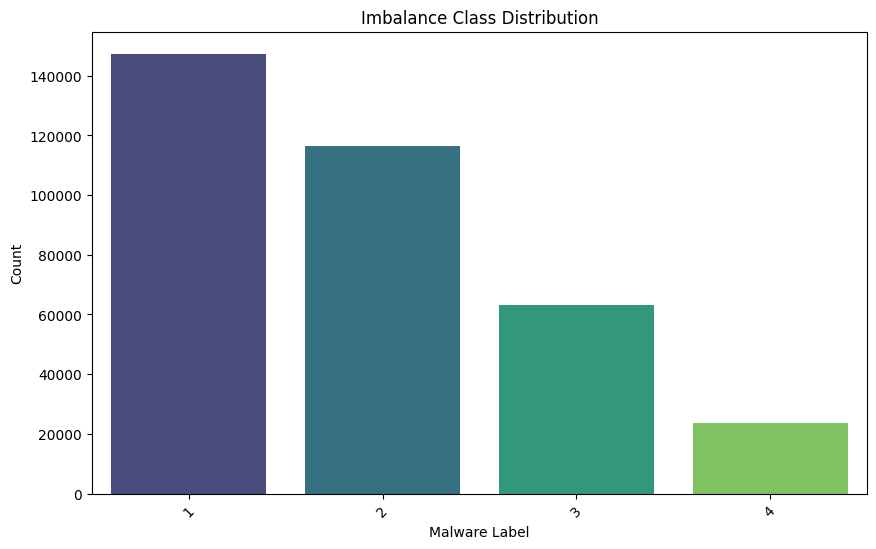

In [85]:
# distribution before balancing
print('imbalance data counts:')
print(mal_df['label'].value_counts())
print_class_distribution(mal_df, 'Imbalance Class Distribution')

In [86]:
def balance_data(df, random_state=0):

  data = df.drop('label', axis=1)
  target = df['label']
  sm = SMOTE(random_state=0)
  data, target = sm.fit_resample(data, target)

  t1 = TomekLinks()
  balanced_data, target= t1.fit_resample(data,target)
  balanced_data['label'] = target

  return balanced_data

balanced data counts:


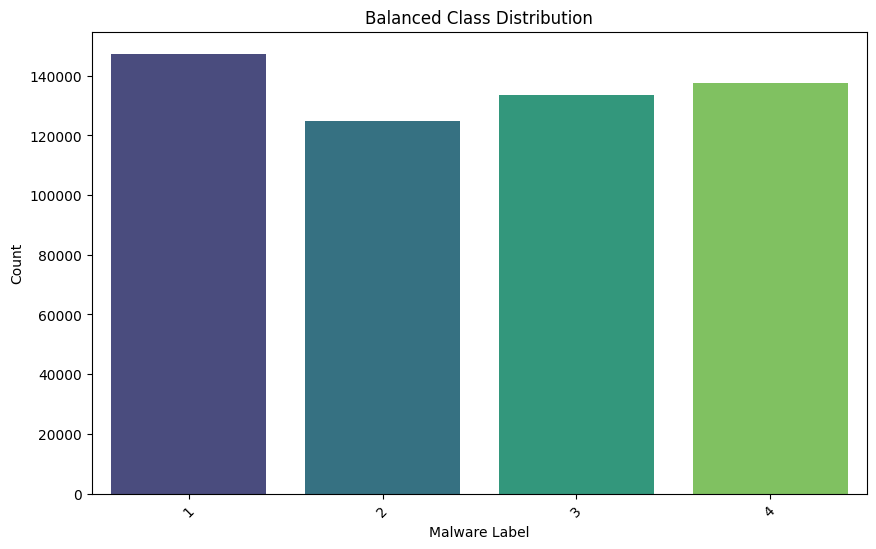

In [87]:
mal_df = balance_data(mal_df)
mal_df['label'] = mal_df['label'].astype(int)
print('balanced data counts:')
mal_df['label'].value_counts()
print_class_distribution(mal_df, 'Balanced Class Distribution')

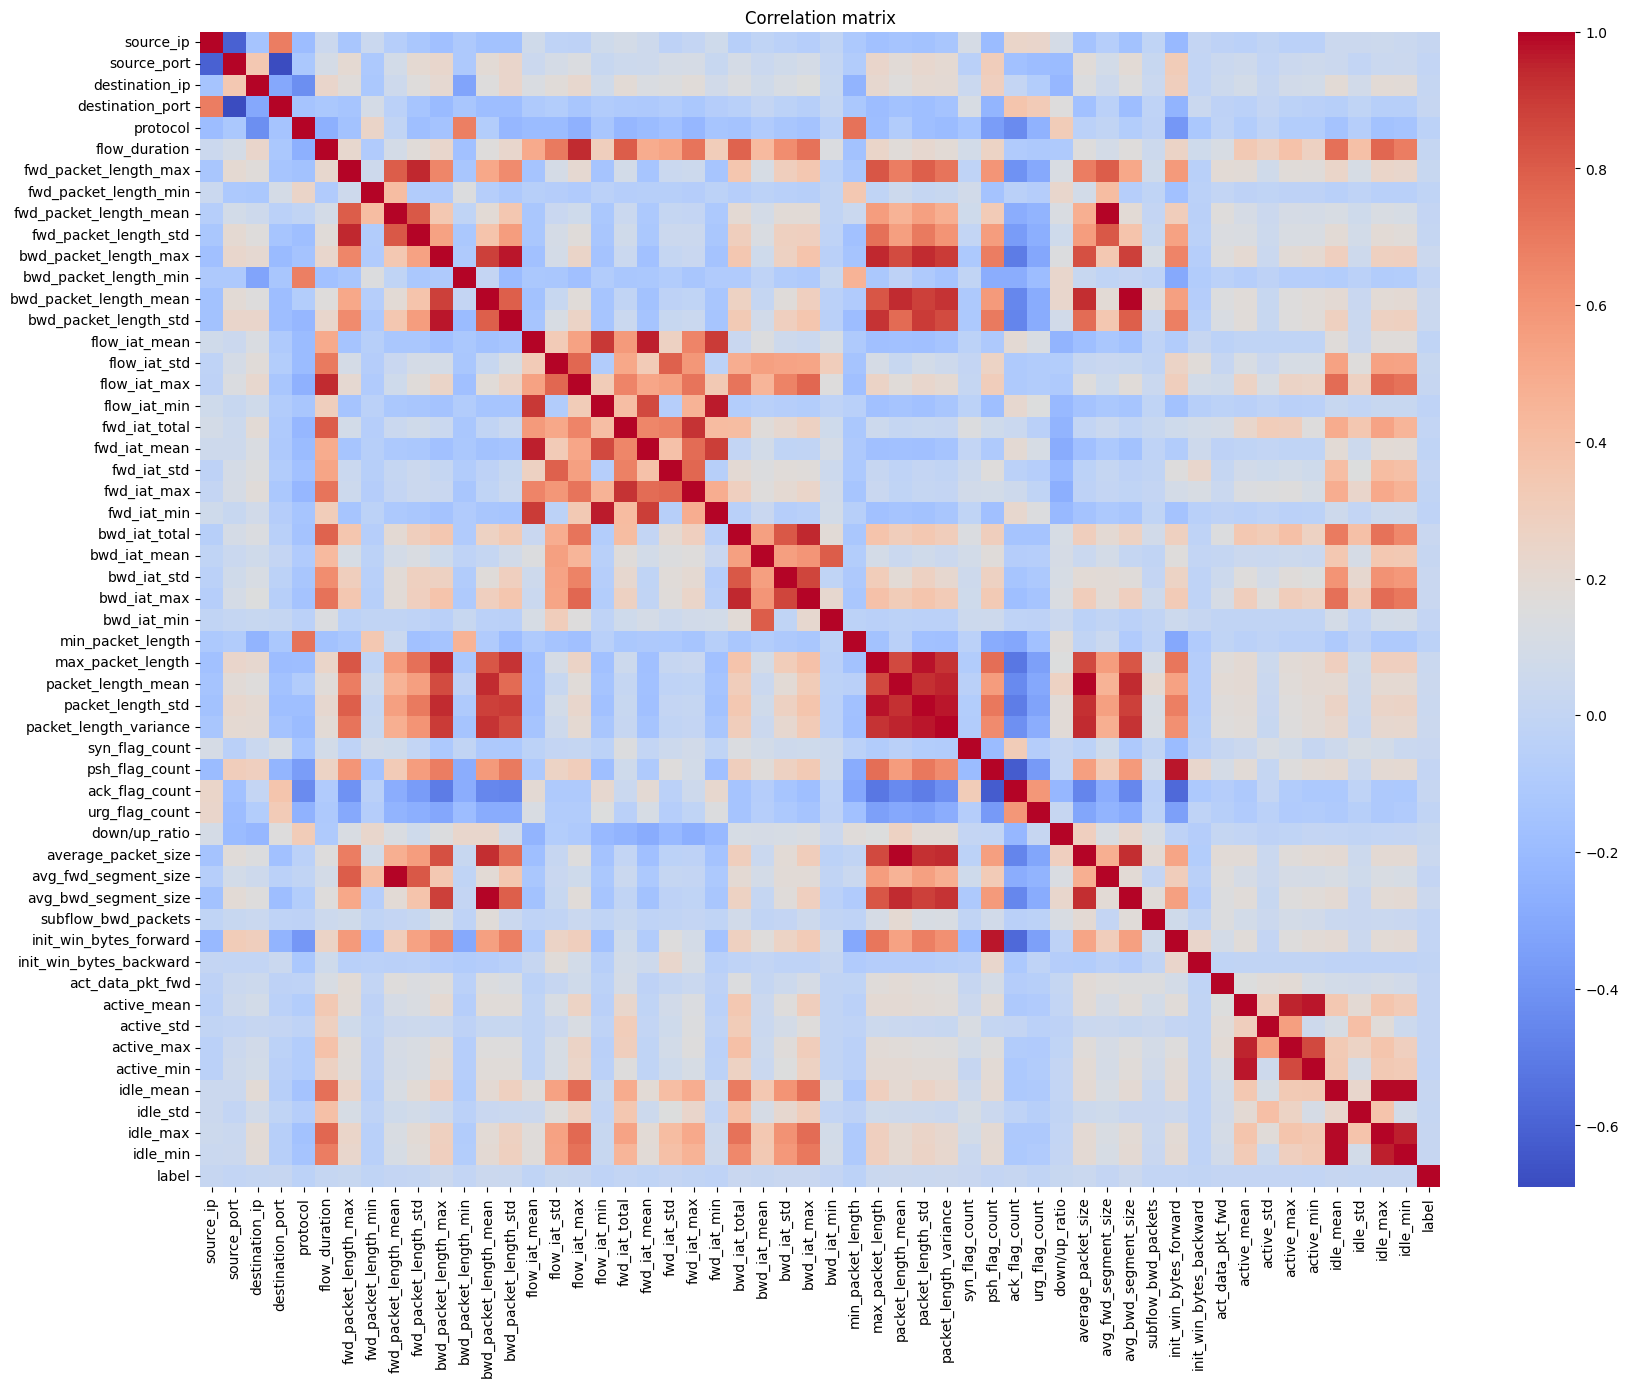

In [88]:
correlation_matrix = mal_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [89]:
def apply_pca(df, n_components=2):
    # Separate input features and output labels
    values = df.values
    X, y = values[:, :-1], values[:, -1]

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # # Apply ICA
    # ica = FastICA(n_components=n_components)
    # X_ica = ica.fit_transform(X)

    # Combine PCA and ICA features with the output label
    df_pca = pd.DataFrame(X_pca, columns=[f'pca_{i+1}' for i in range(n_components)])
    # df_ica = pd.DataFrame(X_ica, columns=[f'ica_{i+1}' for i in range(n_components)])
    # df_combined = pd.concat([df_pca, df_ica, pd.DataFrame(y, columns=['label'])], axis=1)

    return df_pca

In [90]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Android_Adware(Predicted)', 'Android_Scareware(Predicted)', 'Android_SMS_Malware(Predicted)', 'Benign(Predicted)'], 
                yticklabels=['Android_Adware(Actual)', 'Android_Scareware(Actual)', 'Android_SMS_Malware(Actual)', 'Benign(Actual)'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

In [91]:
def train_with_pca(df):
    # Take target classes, and features
    target = df['label']
    x_data = df.iloc[:,:-1]

    x_data = apply_pca(x_data, n_components=2)
    results = {}

    X_train, X_test, y_train, y_test = train_test_split(x_data, target, test_size=0.2, random_state=42)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    results['Random Forest With PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'report': classification_report(y_test, y_pred_rf),
        'confusion_matrix': cm_rf
    }

    # k-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    results['k-Nearest Neighbors With PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_knn),
        'report': classification_report(y_test, y_pred_knn),
        'confusion_matrix': cm_knn
    }

    # Artificial Neural Network (MLP)
    mlp_model = MLPClassifier(random_state=42, max_iter=1000)
    mlp_model.fit(X_train, y_train)
    y_pred_mlp = mlp_model.predict(X_test)
    cm_mlp = confusion_matrix(y_test, y_pred_mlp)
    results['Artificial Neural Network With PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_mlp),
        'report': classification_report(y_test, y_pred_mlp),
        'confusion_matrix': cm_mlp
    }

    # Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    results['Decision Tree With PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_dt),
        'report': classification_report(y_test, y_pred_dt),
        'confusion_matrix': cm_dt
    }

    # Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    results['Naive Bayes With PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_nb),
        'report': classification_report(y_test, y_pred_nb),
        'confusion_matrix': cm_nb
    }

    # Improved printing loop
    for model, result in results.items():
        print(f"{model}:\n")
        print(f"Accuracy: {result['accuracy']}\n")
        print("Classification Report:\n")
        print(result['report'])
        print("Confusion Matrix:\n")
        plot_confusion_matrix(result['confusion_matrix'], model)
        print("\n" + "="*60 + "\n")

In [92]:
def train_without_pca(df):
    # Take target classes, and features
    target = df['label']
    x_data = df.iloc[:,:-1]

    results = {}

    X_train, X_test, y_train, y_test = train_test_split(x_data, target, test_size=0.2, random_state=42)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    results['Random Forest Without PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'report': classification_report(y_test, y_pred_rf),
        'confusion_matrix': cm_rf
    }

    # k-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    results['k-Nearest Neighbors Without PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_knn),
        'report': classification_report(y_test, y_pred_knn),
        'confusion_matrix': cm_knn
    }

    # Artificial Neural Network (MLP)
    mlp_model = MLPClassifier(random_state=42, max_iter=1000)
    mlp_model.fit(X_train, y_train)
    y_pred_mlp = mlp_model.predict(X_test)
    cm_mlp = confusion_matrix(y_test, y_pred_mlp)
    results['Artificial Neural Network Without PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_mlp),
        'report': classification_report(y_test, y_pred_mlp),
        'confusion_matrix': cm_mlp
    }

    # Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    results['Decision Tree Without PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_dt),
        'report': classification_report(y_test, y_pred_dt),
        'confusion_matrix': cm_dt
    }

    # Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    results['Naive Bayes Without PCA'] = {
        'accuracy': accuracy_score(y_test, y_pred_nb),
        'report': classification_report(y_test, y_pred_nb),
        'confusion_matrix': cm_nb
    }

    # Improved printing loop
    for model, result in results.items():
        print(f"{model}:\n")
        print(f"Accuracy: {result['accuracy']}\n")
        print("Classification Report:\n")
        print(result['report'])
        print("Confusion Matrix:\n")
        plot_confusion_matrix(result['confusion_matrix'], model)
        print("\n" + "="*60 + "\n")

Random Forest Without PCA:

Accuracy: 0.7371995435638826

Classification Report:

              precision    recall  f1-score   support

           1       0.72      0.77      0.75     29416
           2       0.62      0.55      0.58     25051
           3       0.79      0.72      0.75     26810
           4       0.80      0.89      0.84     27391

    accuracy                           0.74    108668
   macro avg       0.73      0.73      0.73    108668
weighted avg       0.73      0.74      0.73    108668

Confusion Matrix:



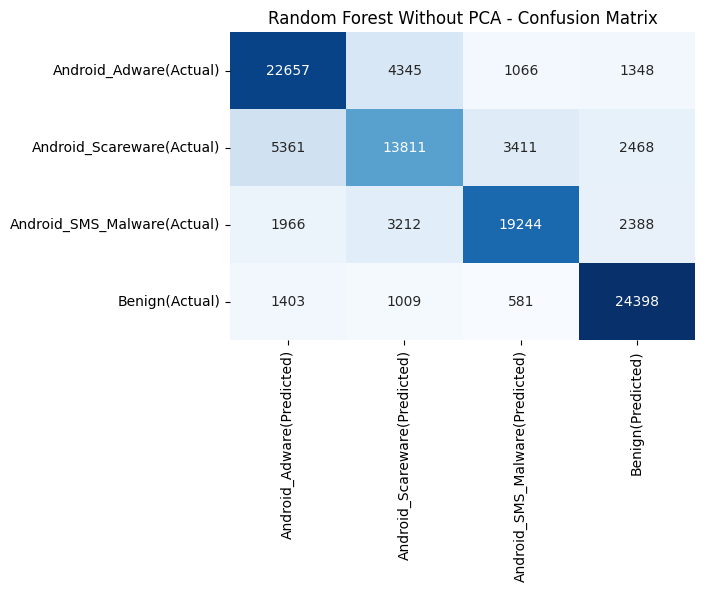



k-Nearest Neighbors Without PCA:

Accuracy: 0.6174218721242685

Classification Report:

              precision    recall  f1-score   support

           1       0.58      0.54      0.56     29416
           2       0.53      0.48      0.50     25051
           3       0.63      0.65      0.64     26810
           4       0.70      0.80      0.75     27391

    accuracy                           0.62    108668
   macro avg       0.61      0.62      0.61    108668
weighted avg       0.61      0.62      0.61    108668

Confusion Matrix:



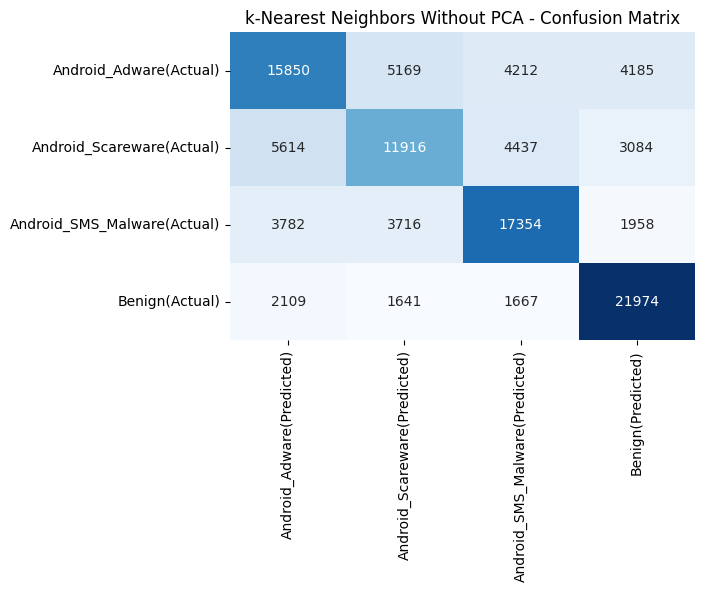



Artificial Neural Network Without PCA:

Accuracy: 0.27071446976110725

Classification Report:

              precision    recall  f1-score   support

           1       0.27      1.00      0.43     29416
           2       1.00      0.00      0.00     25051
           3       0.50      0.00      0.00     26810
           4       0.00      0.00      0.00     27391

    accuracy                           0.27    108668
   macro avg       0.44      0.25      0.11    108668
weighted avg       0.43      0.27      0.12    108668

Confusion Matrix:



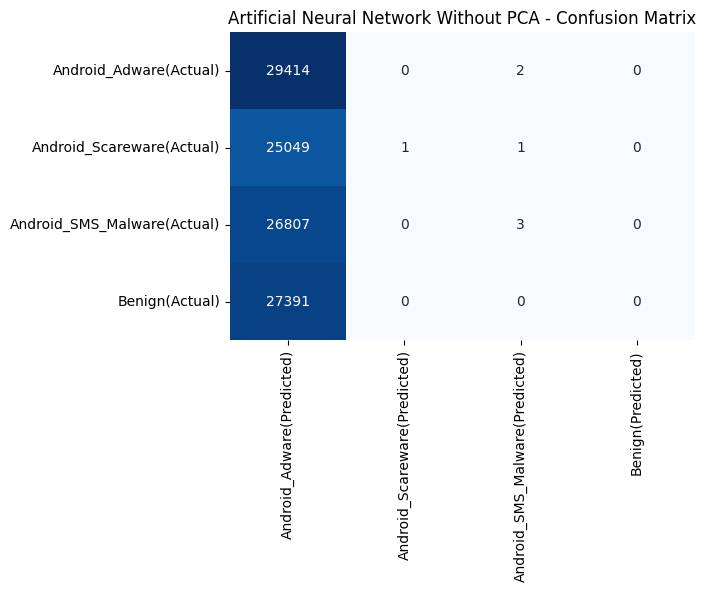



Decision Tree Without PCA:

Accuracy: 0.6777524202157029

Classification Report:

              precision    recall  f1-score   support

           1       0.72      0.71      0.72     29416
           2       0.54      0.56      0.55     25051
           3       0.69      0.67      0.68     26810
           4       0.74      0.76      0.75     27391

    accuracy                           0.68    108668
   macro avg       0.67      0.67      0.67    108668
weighted avg       0.68      0.68      0.68    108668

Confusion Matrix:



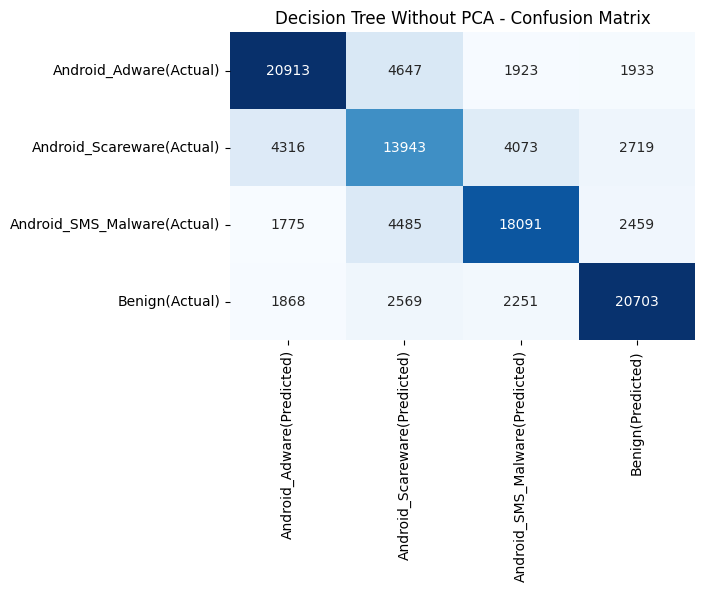



Naive Bayes Without PCA:

Accuracy: 0.2871682556042257

Classification Report:

              precision    recall  f1-score   support

           1       0.28      0.82      0.42     29416
           2       0.25      0.03      0.05     25051
           3       0.32      0.13      0.18     26810
           4       0.29      0.11      0.16     27391

    accuracy                           0.29    108668
   macro avg       0.29      0.27      0.20    108668
weighted avg       0.29      0.29      0.21    108668

Confusion Matrix:



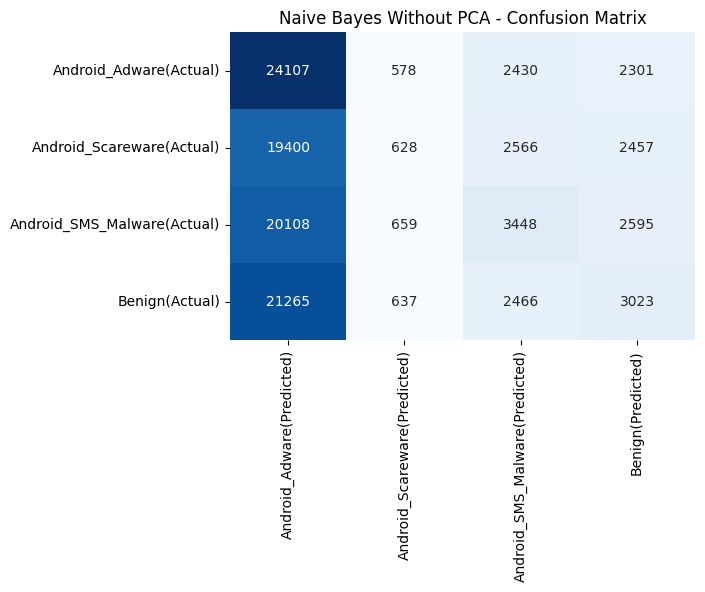



Random Forest With PCA:

Accuracy: 0.44217248868112047

Classification Report:

              precision    recall  f1-score   support

           1       0.45      0.44      0.44     29416
           2       0.37      0.36      0.37     25051
           3       0.44      0.45      0.45     26810
           4       0.50      0.51      0.50     27391

    accuracy                           0.44    108668
   macro avg       0.44      0.44      0.44    108668
weighted avg       0.44      0.44      0.44    108668

Confusion Matrix:



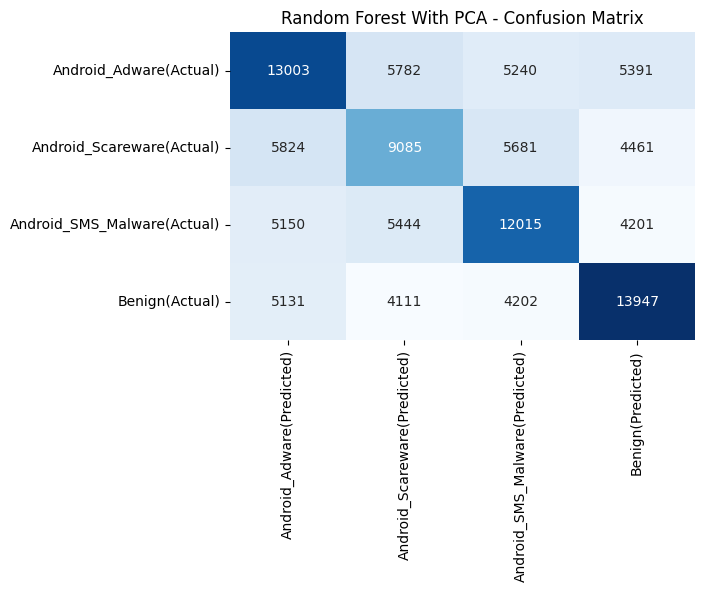



k-Nearest Neighbors With PCA:

Accuracy: 0.4366142746714764

Classification Report:

              precision    recall  f1-score   support

           1       0.42      0.50      0.46     29416
           2       0.36      0.35      0.36     25051
           3       0.46      0.42      0.44     26810
           4       0.52      0.46      0.49     27391

    accuracy                           0.44    108668
   macro avg       0.44      0.43      0.43    108668
weighted avg       0.44      0.44      0.44    108668

Confusion Matrix:



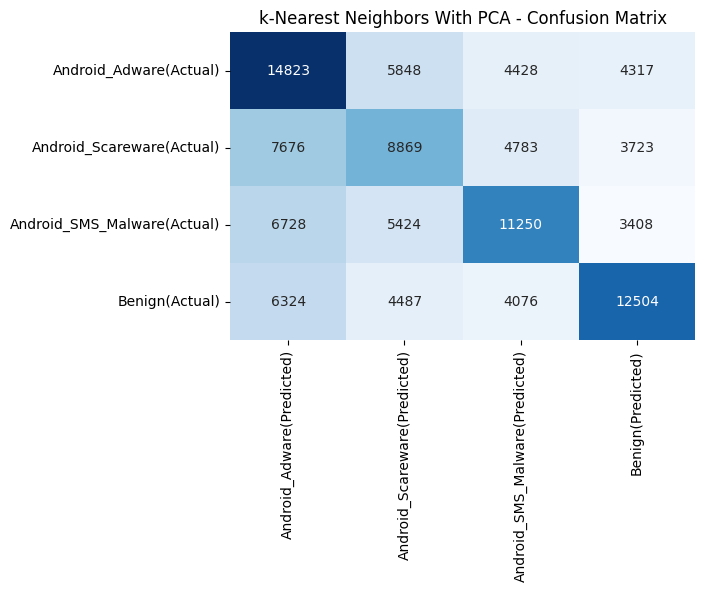



Artificial Neural Network With PCA:

Accuracy: 0.2516104096882247

Classification Report:

              precision    recall  f1-score   support

           1       0.24      0.01      0.02     29416
           2       0.24      0.12      0.16     25051
           3       0.25      0.80      0.38     26810
           4       0.32      0.10      0.15     27391

    accuracy                           0.25    108668
   macro avg       0.26      0.26      0.18    108668
weighted avg       0.26      0.25      0.17    108668

Confusion Matrix:



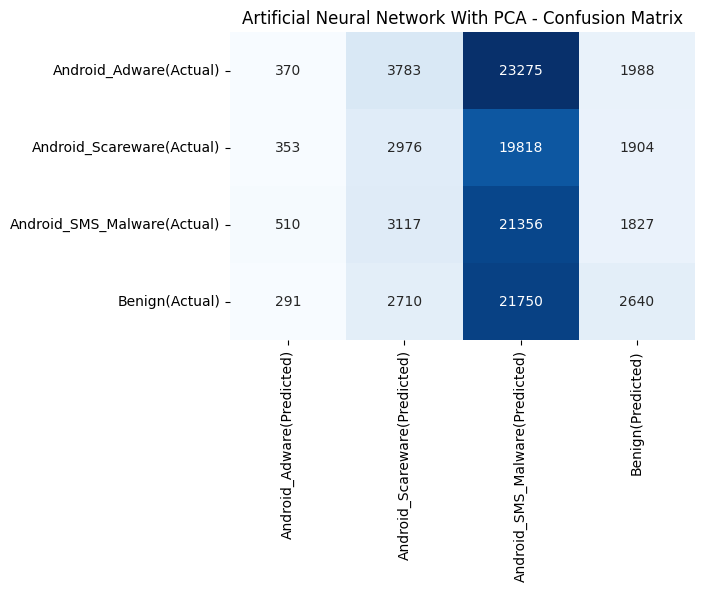



Decision Tree With PCA:

Accuracy: 0.42258070453123275

Classification Report:

              precision    recall  f1-score   support

           1       0.43      0.44      0.43     29416
           2       0.35      0.36      0.36     25051
           3       0.42      0.41      0.41     26810
           4       0.49      0.47      0.48     27391

    accuracy                           0.42    108668
   macro avg       0.42      0.42      0.42    108668
weighted avg       0.42      0.42      0.42    108668

Confusion Matrix:



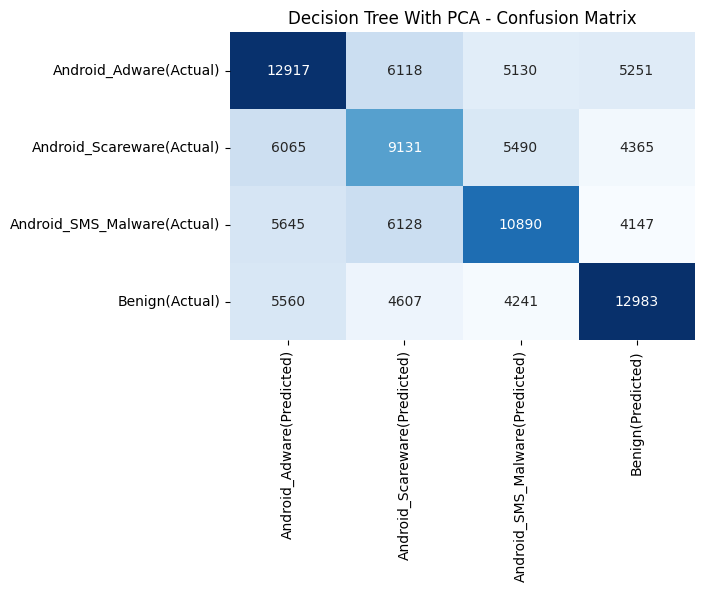



Naive Bayes With PCA:

Accuracy: 0.27920823057385796

Classification Report:

              precision    recall  f1-score   support

           1       0.28      0.88      0.42     29416
           2       0.00      0.00      0.00     25051
           3       0.30      0.14      0.19     26810
           4       0.28      0.02      0.04     27391

    accuracy                           0.28    108668
   macro avg       0.21      0.26      0.16    108668
weighted avg       0.22      0.28      0.17    108668

Confusion Matrix:



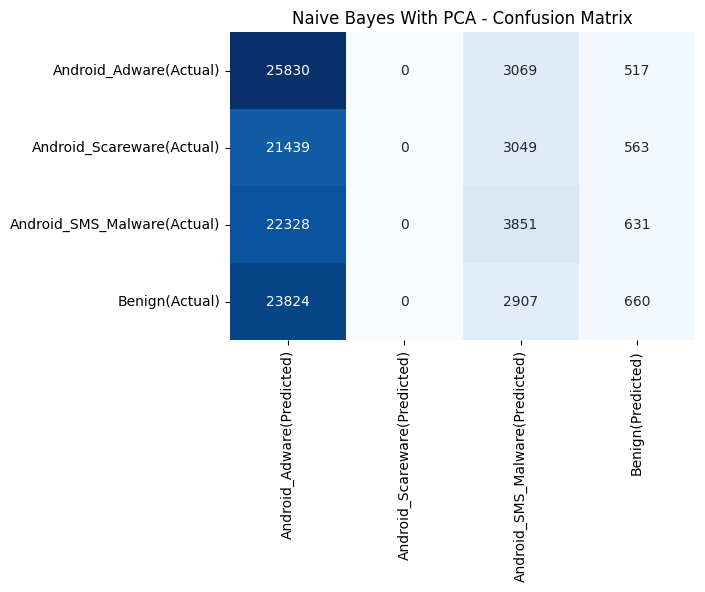

In [93]:
train_without_pca(mal_df)
train_with_pca(mal_df)